In [1]:
%load_ext autoreload
%autoreload 2

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from src.config import filepaths
from src.chem_draw import draw_molecule, draw_reaction, _draw_pr_x_kr
from rdkit.Chem.Draw import MolsToGridImage
import pathlib
import os
from src.post_processing import PathWrangler
import ipywidgets as widgets
from IPython.display import SVG

In [11]:
targets = pd.read_csv(filepaths['starters_targets'] / "bottle_targets_24.csv", sep=',')
pivalic_acid = pd.read_csv(filepaths['starters_targets'] / "pivalic_acid.csv", sep=',')
dmb = pd.read_csv(filepaths['starters_targets'] / "dmb.csv", sep=',')
dmhb = pd.read_csv(filepaths['starters_targets'] / "dmhb.csv", sep=',')
ccm_aa = pd.read_csv(filepaths['starters_targets'] / "ccm_aa.csv", sep=',')
s2m = lambda x : Chem.MolFromSmiles(x)

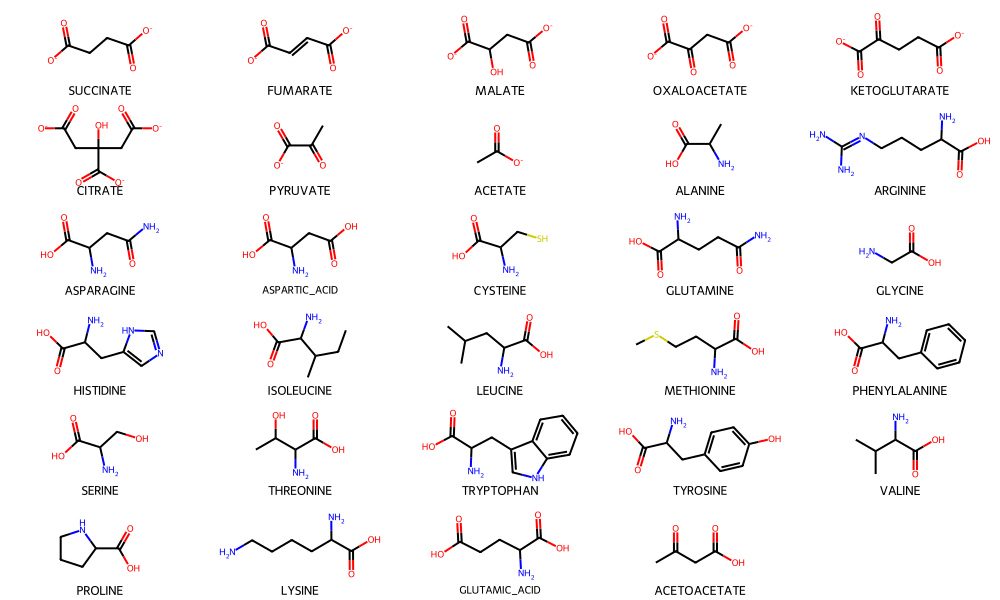

In [18]:
block_a = ccm_aa
MolsToGridImage(
    [s2m(elt) for elt in block_a['smiles']],
    legends=block_a['id'].apply(str.upper).to_list(),
    molsPerRow=5,
    subImgSize=(200, 100)
)

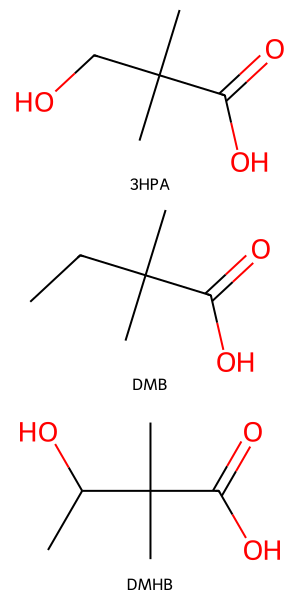

In [13]:
MolsToGridImage(
    [s2m(elt) for elt in targets['smiles']],
    legends=targets['id'].apply(str.upper).to_list(),
    molsPerRow=1,
    subImgSize=(300, 200)
)

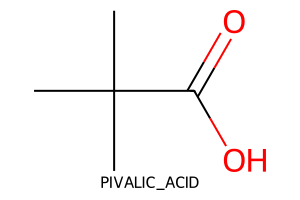

In [14]:
MolsToGridImage(
    [s2m(elt) for elt in pivalic_acid['smiles']],
    legends=pivalic_acid['id'].apply(str.upper).to_list(),
    molsPerRow=1,
    subImgSize=(300, 200)
)

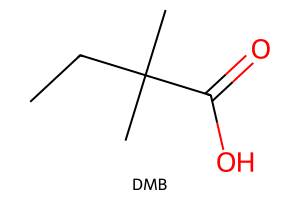

In [15]:
MolsToGridImage(
    [s2m(elt) for elt in dmb['smiles']],
    legends=dmb['id'].apply(str.upper).to_list(),
    molsPerRow=1,
    subImgSize=(300, 200)
)

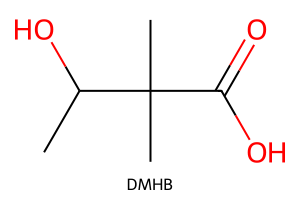

In [16]:
MolsToGridImage(
    [s2m(elt) for elt in dmhb['smiles']],
    legends=dmhb['id'].apply(str.upper).to_list(),
    molsPerRow=1,
    subImgSize=(300, 200)
)

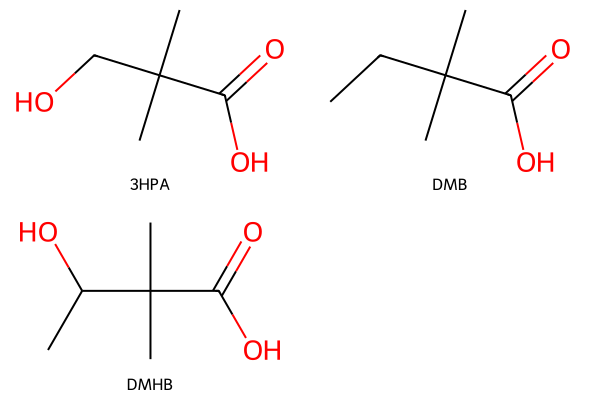

In [17]:
MolsToGridImage(
    [s2m(elt) for elt in targets['smiles']],
    legends=targets['id'].apply(str.upper).to_list(),
    molsPerRow=2,
    subImgSize=(300, 200)
)

Pulled paths

In [2]:
proc_exp = pathlib.Path(os.environ.get("BOTTLE_EXPANSION_ASSETS"))
img_subdir = 'svgs'
pw = PathWrangler(proc_exp, img_subdir)

In [ ]:
path_ids = [

    # block a to block b
    'P2546968f0b242e4e5010bda4d022430dfe605488',
    'Pde330aa439c1e3980eb9b49d427a7336c5af35c4',
    'Pe0d8788f319f4914a1c47d075e1fd6ec9b6ec94b',

    # # pivalic acid dimethylmalonate 3hpa
    # 'P20788482ba8f952c2b516fd366680b7b04f37a26',
    # 'Pfca99f91af57ebb5745271f74384c2beae62780f',

    # # among block b
    # 'Pe51c2d9fa49e794a7039aa32f6ac1c886acdf7eb',

    

]

size = (1500, 200)


for pid in path_ids:
    path = pw.get_path_with_id(pid=pid)
    rows = []
    for pr in path.reactions:
        rows.append(widgets.HTML(_draw_pr_x_kr(pr.smarts, pr.top_analogues(k=1)[0].smarts, size=size).to_str()))


    block = widgets.VBox(rows)
    display(block)

In [16]:
for pid in path_ids:
    path = pw.get_path_with_id(pid=pid)

    print(f"{pid[:10]}: {path.starter} => {path.target}")

P2546968f0: succinate => dmhb
Pde330aa43: succinate => dmhb
Pe0d8788f3: valine => dmhb


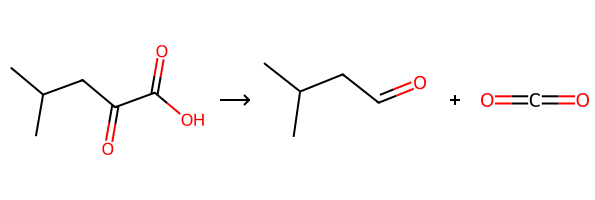

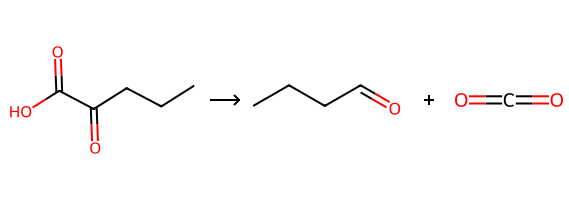

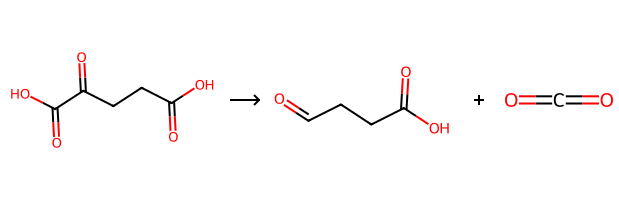

In [14]:
decarb_id = 'Pa5a01e066c2b1786a9575a22e31e1af391c58dac'
good_kr_idxs = [4, 6, 7]
path = pw.get_path_with_id(decarb_id)
rxn = path.reactions[0]
krs = rxn.top_analogues(k=10)
good_krs = [krs[i] for i in good_kr_idxs]
for kr in good_krs:
    display(SVG(kr.image))